In [18]:
import tensorflow as tf
import matplotlib.pyplot as plt
import time

In [5]:
#importing the mnist dataset from keras which 28x28 images of handwritten numbers from 0-9
mnist=tf.keras.datasets.mnist

In [7]:
#dividing the imported data as training and test set
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [14]:
#normalizing the data between 0 to 1 as the pixel data is 0-255 and normalizing makes it easier and faster for network to learn
#makes the learning faster as well
x_train_normalized= tf.keras.utils.normalize(x_train,axis=1)
x_test_normalized= tf.keras.utils.normalize(x_test,axis=1)

In [23]:
print('Start time:'+str(time.time()))
#Building the sequential model which is feed forward
model=tf.keras.models.Sequential()

#converting the 28x28 multidimensional array into a flat array
#instead of keras flatten we can also use numpy reshape
#the input layer
model.add(tf.keras.layers.Flatten())

#now taking the hidden layer as dense layer with 128 units/neuron and rectified linear as activation function
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#adding the second hidden layer
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))

#adding the output layer where the o. of units will be number of classification i.e 10
#using softmax in output layer for probability distribution
model.add(tf.keras.layers.Dense(10,activation=tf.nn.softmax))

#initializing the hyperparameters
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

#training the model
#epoch is used to define the number of times we want the neural network to go over the dataset
model.fit(x_train_normalized,y_train,epochs=3)
print('end time:'+str(time.time()))

Start time:1539395951.4835167
Epoch 1/3
60000/60000 [==============================] - 5s 78us/step - loss: 0.2670 - acc: 0.9199
Epoch 2/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.1099 - acc: 0.9668
Epoch 3/3
60000/60000 [==============================] - 5s 81us/step - loss: 0.0740 - acc: 0.9766
end time:1539395965.9569485


In [24]:
#running the built model over the test dataset
model.evaluate(x_test_normalized,y_test)

10000/10000 [==============================] - 0s 35us/step


[0.09565742212943733, 0.9707]

In [25]:
#saving the used model
model.save('C:/Users/Nikhar/Downloads/Side_work/TensorFlow/project/model/mnist_normalized.model')

In [27]:
model_load=tf.keras.models.load_model('C:/Users/Nikhar/Downloads/Side_work/TensorFlow/project/model/mnist_normalized.model')

In [28]:

model_load.evaluate(x_test_normalized,y_test)

10000/10000 [==============================] - 0s 48us/step


[0.09565742212943733, 0.9707]

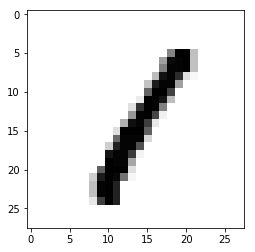

In [12]:
#checking the downloaded data
#cmap=plt.cm.binary shows the image in black and white
plt.imshow(x_train[3],cmap=plt.cm.binary)
plt.show()

In [13]:
print(y_train[3])

1
